In [8]:
import numpy as np
import matplotlib.pyplot as plt

def l0_error(elm, elm_hat):
    return np.linalg.norm(elm - elm_hat, ord=0)

def l1_error(elm, elm_hat):
    return np.linalg.norm(elm - elm_hat, ord=1)

def relative_error(elm, elm_hat):
    return np.divide(np.linalg.norm(elm - elm_hat, ord=2),
                     np.linalg.norm(elm, ord=1))

def cosamp(phi, u, s, epsilon=1e-10, max_iter=100):
    """
    Return an `s`-sparse approximation of the target signal
    Input:
        - phi, sampling matrix
        - u, noisy sample vector
        - s, sparsity
    """
    a = np.zeros(phi.shape[1])
    v = u
    it = 0 # count
    halt = False
    while not halt:
        it += 1

        y = np.dot(np.transpose(phi), v)
        omega = np.argsort(y)[-(2*s):] # large components
        omega = np.union1d(omega, a.nonzero()[0]) # use set instead?
        phiT = phi[:, omega]
        b = np.zeros(phi.shape[1])
        # Solve Least Square
        b[omega], _, _, _ = np.linalg.lstsq(phiT, u,rcond=-1)

        # Get new estimate
        b[np.argsort(b)[:-s]] = 0
        a = b

        # Halt criterion
        v_old = v
        v = u - np.dot(phi, a)

        halt = (np.linalg.norm(v - v_old) < epsilon) or \
            np.linalg.norm(v) < epsilon or \
            it > max_iter

    return a

In [3]:
from scipy.fftpack import dct

def compressed_sensing(n, k):
    s = np.concatenate((np.random.rand(k), np.zeros(n - k)))
    np.random.shuffle(s)
    Psi = dct(np.identity(n))

    rel_tot = []
    l0_tot = []
    l1_tot = []

    for p in range(1, 101):
        print("N = " + str(n) + ", K = " + str(k) + ", P = " + str(p))

        rel_holder = []
        l1_holder = []
        l0_holder = []

        for a in range(10):
            C = np.random.randn(p, n)
            theta = np.matmul(C, Psi)
            y = np.matmul(theta, s)
            s_hat = cosamp(theta, y, p)

            rel_holder.append(relative_error(s, s_hat))
            l0_holder.append(l0_error(s, s_hat))
            l1_holder.append(l1_error(s, s_hat))

        rel_tot.append(np.mean(rel_holder))
        l0_tot.append(np.mean(l0_holder))
        l1_tot.append(np.mean(l1_holder))

    return np.array(rel_tot), np.array(l0_tot), np.array(l1_tot)

N = 1000, K = 20, P = 1
N = 1000, K = 20, P = 2
N = 1000, K = 20, P = 3
N = 1000, K = 20, P = 4
N = 1000, K = 20, P = 5
N = 1000, K = 20, P = 6
N = 1000, K = 20, P = 7
N = 1000, K = 20, P = 8
N = 1000, K = 20, P = 9
N = 1000, K = 20, P = 10
N = 1000, K = 20, P = 11
N = 1000, K = 20, P = 12
N = 1000, K = 20, P = 13
N = 1000, K = 20, P = 14
N = 1000, K = 20, P = 15
N = 1000, K = 20, P = 16
N = 1000, K = 20, P = 17
N = 1000, K = 20, P = 18
N = 1000, K = 20, P = 19
N = 1000, K = 20, P = 20
N = 1000, K = 20, P = 21
N = 1000, K = 20, P = 22
N = 1000, K = 20, P = 23
N = 1000, K = 20, P = 24
N = 1000, K = 20, P = 25
N = 1000, K = 20, P = 26
N = 1000, K = 20, P = 27
N = 1000, K = 20, P = 28
N = 1000, K = 20, P = 29
N = 1000, K = 20, P = 30
N = 1000, K = 20, P = 31
N = 1000, K = 20, P = 32
N = 1000, K = 20, P = 33
N = 1000, K = 20, P = 34
N = 1000, K = 20, P = 35
N = 1000, K = 20, P = 36
N = 1000, K = 20, P = 37
N = 1000, K = 20, P = 38
N = 1000, K = 20, P = 39
N = 1000, K = 20, P = 40
N = 1000,

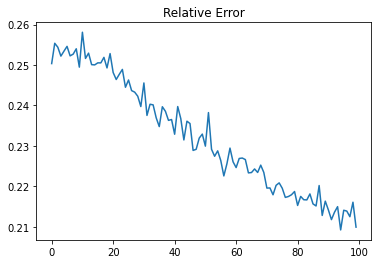

In [3]:
rel, l0, l1 = compressed_sensing(1000, 20)

plt.title("Relative Error")
plt.plot(rel)
plt.show()

So as we can see, the average relative error decreases as we increase p.

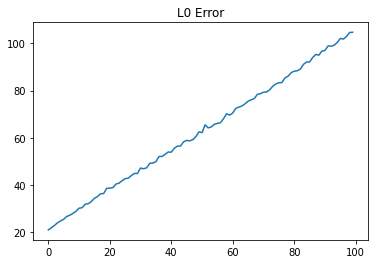

In [4]:
plt.title("L0 Error")
plt.plot(l0)
plt.show()

Our mean L0 error increases linearly with p

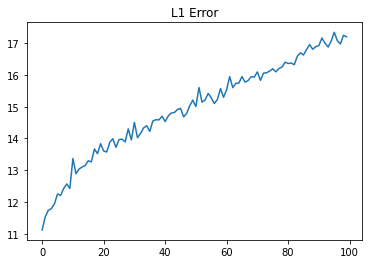

In [5]:
plt.title("L1 Error")
plt.plot(l1)
plt.show()

The L1 error increases as p increases.

In [6]:
rel_all = []
l0_all = []
l1_all = []

for i in range(1, 21):
    rel_temp, l0_temp, l1_temp = compressed_sensing(1000, i)

    rel_all.append(rel_temp)
    l0_all.append(l0_temp)
    l1_all.append(l1_temp)

N = 1000, K = 1, P = 1
N = 1000, K = 1, P = 2
N = 1000, K = 1, P = 3
N = 1000, K = 1, P = 4
N = 1000, K = 1, P = 5
N = 1000, K = 1, P = 6
N = 1000, K = 1, P = 7
N = 1000, K = 1, P = 8
N = 1000, K = 1, P = 9
N = 1000, K = 1, P = 10
N = 1000, K = 1, P = 11
N = 1000, K = 1, P = 12
N = 1000, K = 1, P = 13
N = 1000, K = 1, P = 14
N = 1000, K = 1, P = 15
N = 1000, K = 1, P = 16
N = 1000, K = 1, P = 17
N = 1000, K = 1, P = 18
N = 1000, K = 1, P = 19
N = 1000, K = 1, P = 20
N = 1000, K = 1, P = 21
N = 1000, K = 1, P = 22
N = 1000, K = 1, P = 23
N = 1000, K = 1, P = 24
N = 1000, K = 1, P = 25
N = 1000, K = 1, P = 26
N = 1000, K = 1, P = 27
N = 1000, K = 1, P = 28
N = 1000, K = 1, P = 29
N = 1000, K = 1, P = 30
N = 1000, K = 1, P = 31
N = 1000, K = 1, P = 32
N = 1000, K = 1, P = 33
N = 1000, K = 1, P = 34
N = 1000, K = 1, P = 35
N = 1000, K = 1, P = 36
N = 1000, K = 1, P = 37
N = 1000, K = 1, P = 38
N = 1000, K = 1, P = 39
N = 1000, K = 1, P = 40
N = 1000, K = 1, P = 41
N = 1000, K = 1, P = 42
N

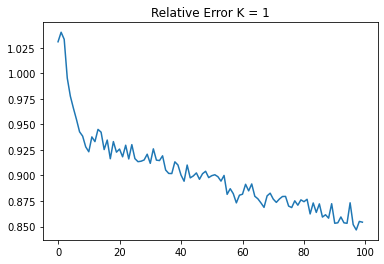

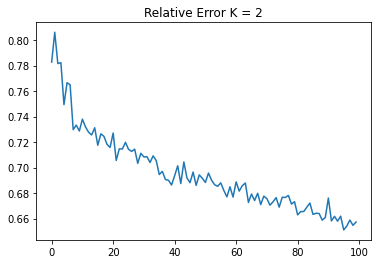

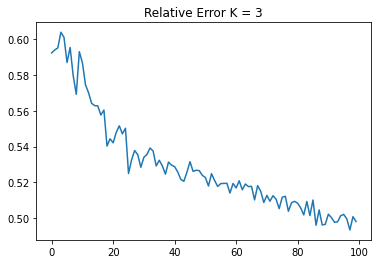

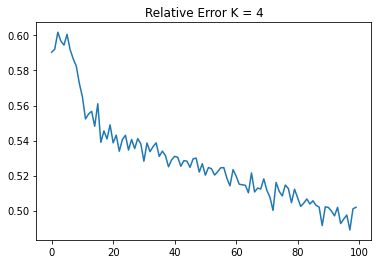

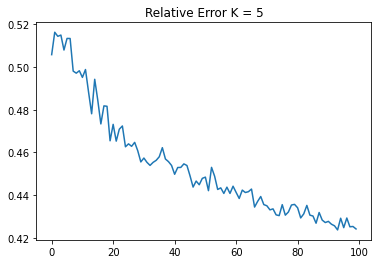

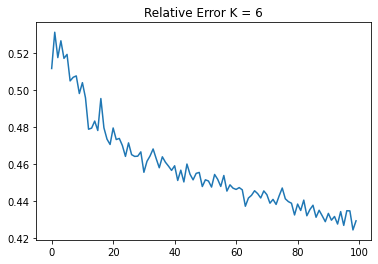

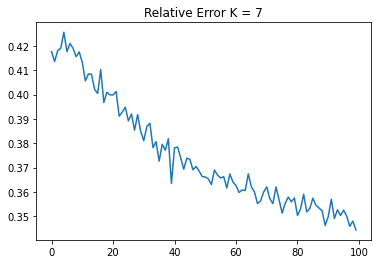

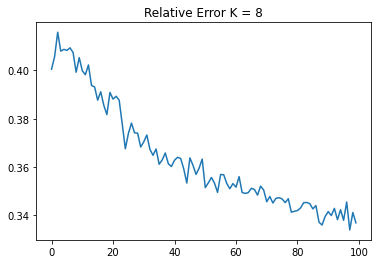

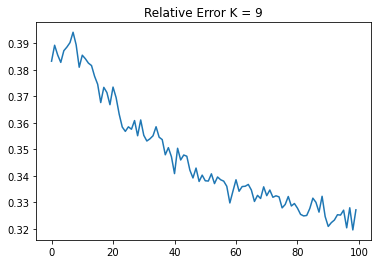

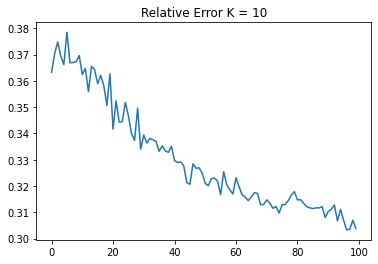

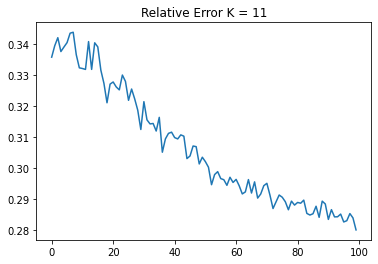

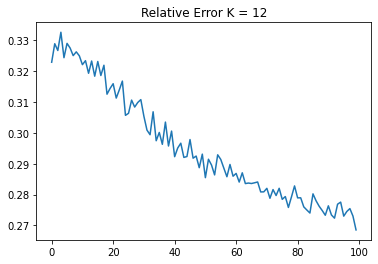

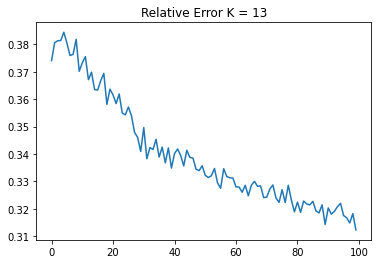

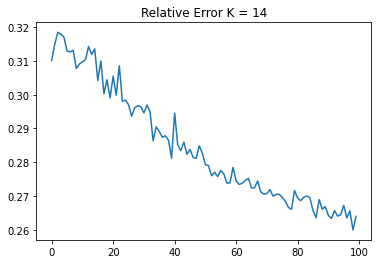

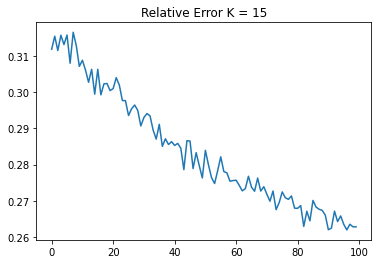

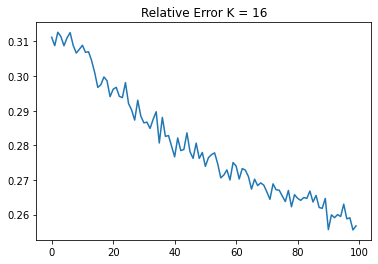

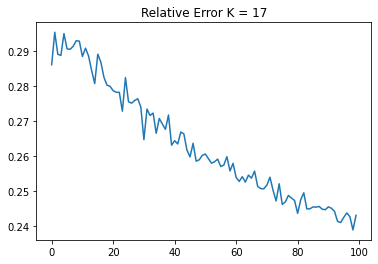

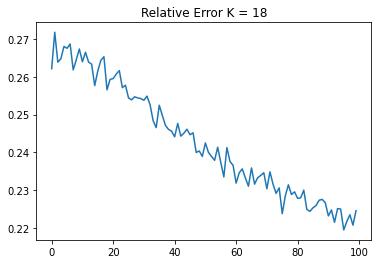

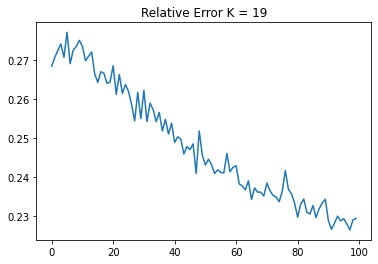

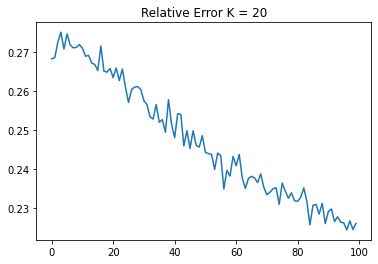

In [7]:
for i in range(20):
    plt.plot(rel_all[i])
    plt.title("Relative Error K = " + str(i + 1))
    plt.show()

As we increase K, the relative error at low P is higher, but at high Ps it is lower

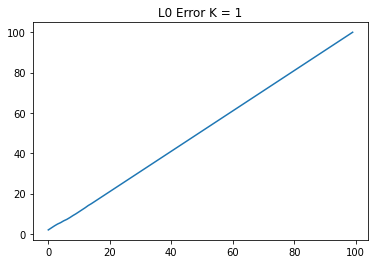

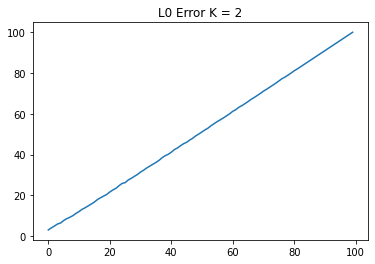

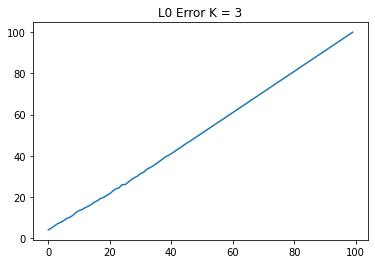

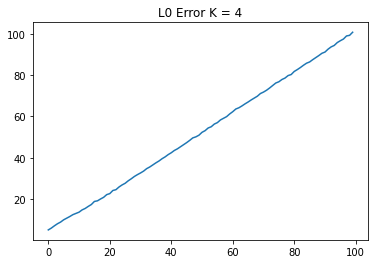

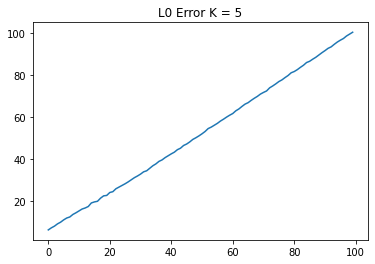

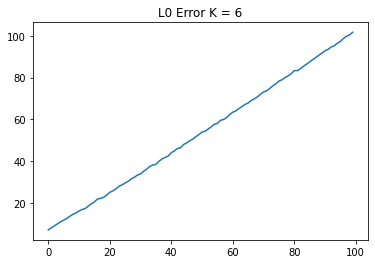

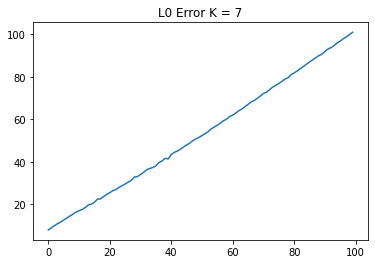

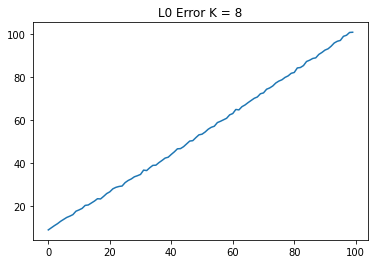

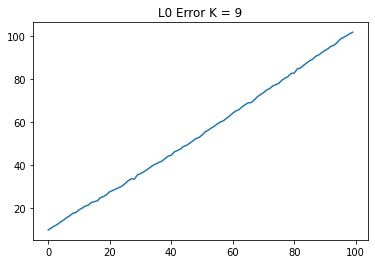

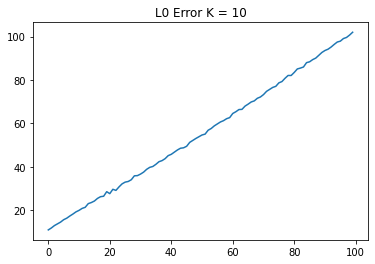

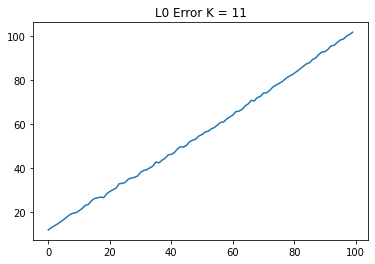

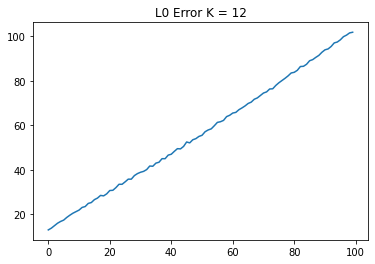

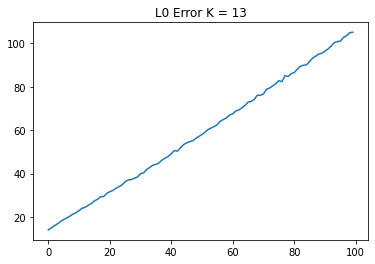

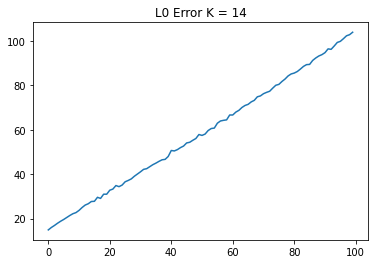

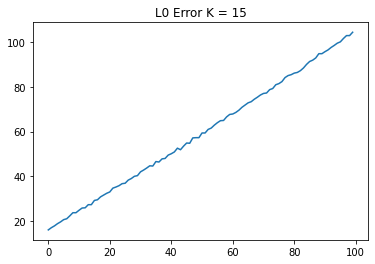

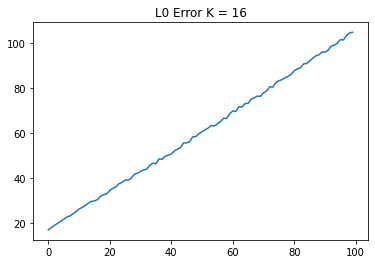

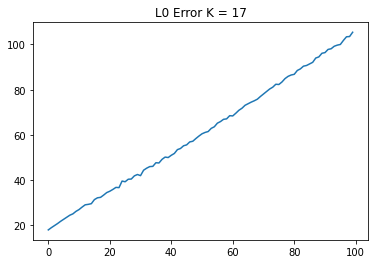

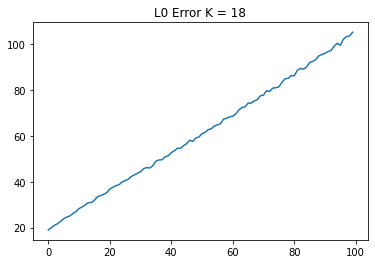

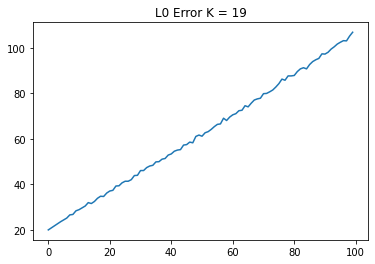

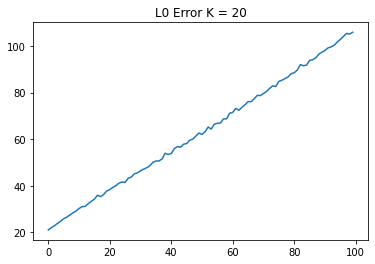

In [8]:
for i in range(20):
    plt.plot(l0_all[i])
    plt.title("L0 Error K = " + str(i + 1))
    plt.show()

L0 error stays consistent with all K

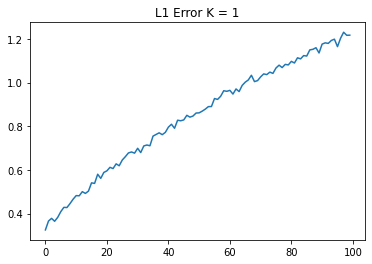

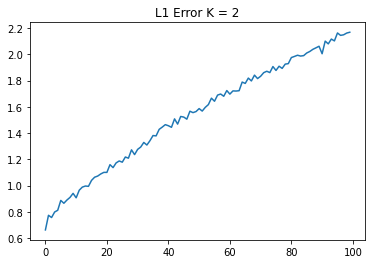

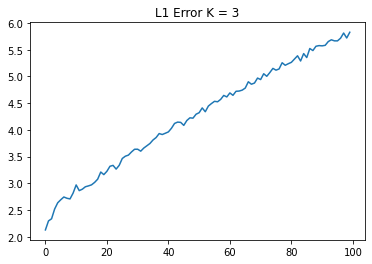

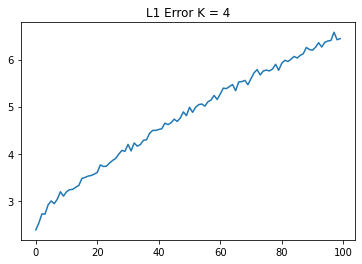

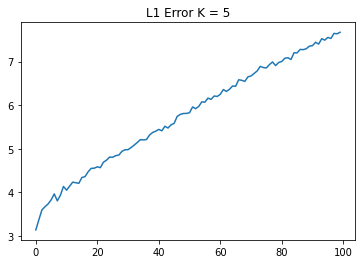

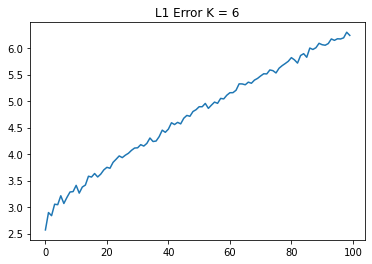

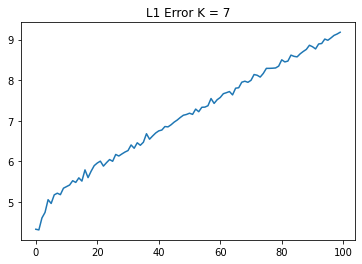

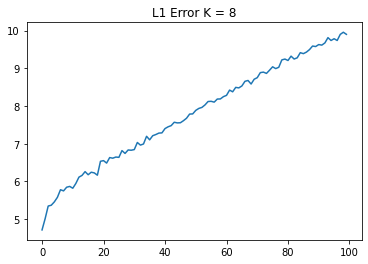

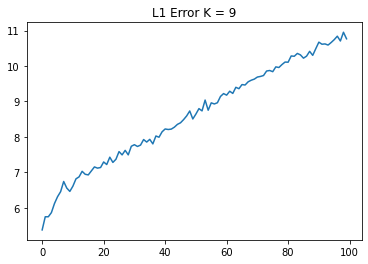

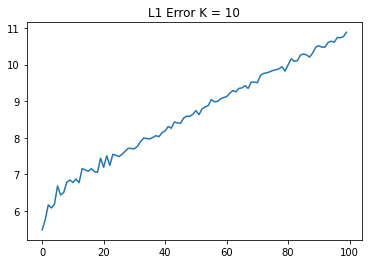

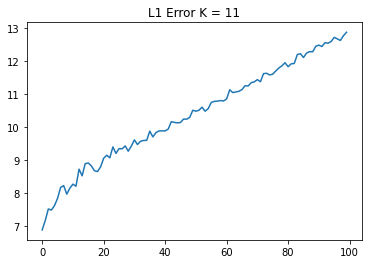

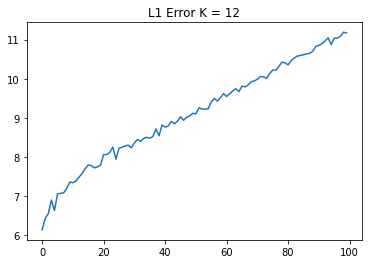

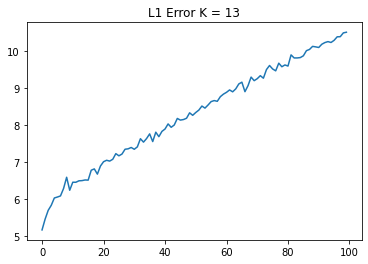

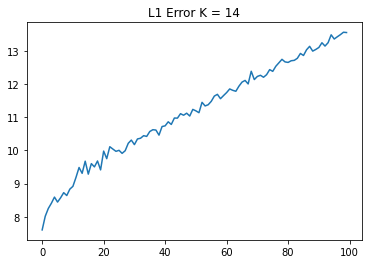

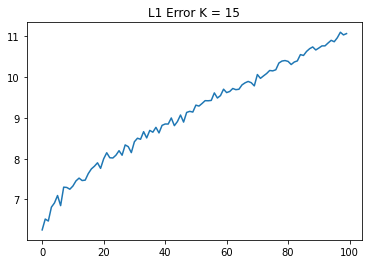

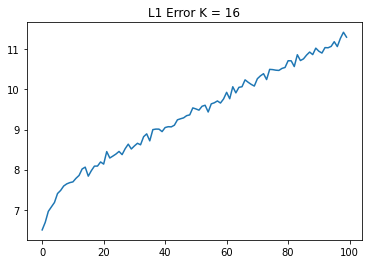

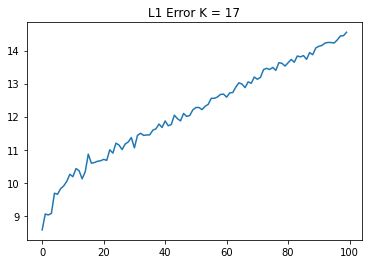

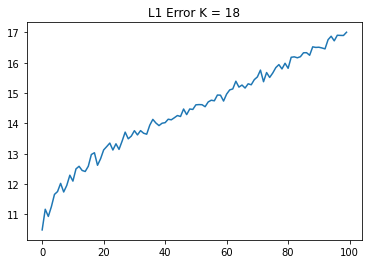

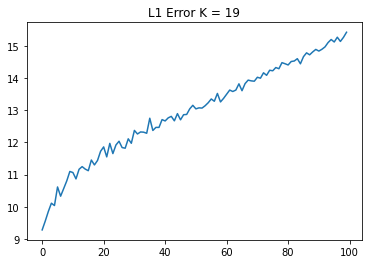

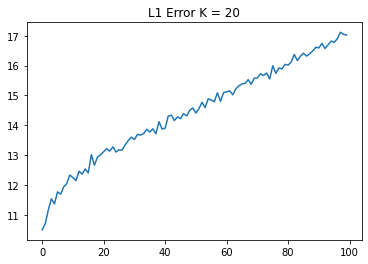

In [9]:
for i in range(20):
    plt.plot(l1_all[i])
    plt.title("L1 Error K = " + str(i + 1))
    plt.show()

The L1 error in higher K has a larger growth, and reaches higher errors

In [5]:
rel_all = []
l0_all = []
l1_all = []

for i in (100, 500, 1000, 2000, 5000):
    rel_temp, l0_temp, l1_temp = compressed_sensing(i, 5)

    rel_all.append(rel_temp)
    l0_all.append(l0_temp)
    l1_all.append(l1_temp)

N = 100, K = 5, P = 1
N = 100, K = 5, P = 2
N = 100, K = 5, P = 3
N = 100, K = 5, P = 4
N = 100, K = 5, P = 5
N = 100, K = 5, P = 6
N = 100, K = 5, P = 7
N = 100, K = 5, P = 8
N = 100, K = 5, P = 9
N = 100, K = 5, P = 10
N = 100, K = 5, P = 11
N = 100, K = 5, P = 12
N = 100, K = 5, P = 13
N = 100, K = 5, P = 14
N = 100, K = 5, P = 15
N = 100, K = 5, P = 16
N = 100, K = 5, P = 17
N = 100, K = 5, P = 18
N = 100, K = 5, P = 19
N = 100, K = 5, P = 20
N = 100, K = 5, P = 21
N = 100, K = 5, P = 22
N = 100, K = 5, P = 23
N = 100, K = 5, P = 24
N = 100, K = 5, P = 25
N = 100, K = 5, P = 26
N = 100, K = 5, P = 27
N = 100, K = 5, P = 28
N = 100, K = 5, P = 29
N = 100, K = 5, P = 30
N = 100, K = 5, P = 31
N = 100, K = 5, P = 32
N = 100, K = 5, P = 33
N = 100, K = 5, P = 34
N = 100, K = 5, P = 35
N = 100, K = 5, P = 36
N = 100, K = 5, P = 37
N = 100, K = 5, P = 38
N = 100, K = 5, P = 39
N = 100, K = 5, P = 40
N = 100, K = 5, P = 41
N = 100, K = 5, P = 42
N = 100, K = 5, P = 43
N = 100, K = 5, P = 

In [6]:
def get_n(val):
    if val == 0:
        return 100
    elif val == 1:
        return 500
    elif val == 2:
        return 1000
    elif val == 3:
        return 2000
    else:
        return 5000

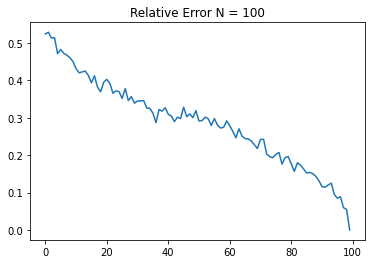

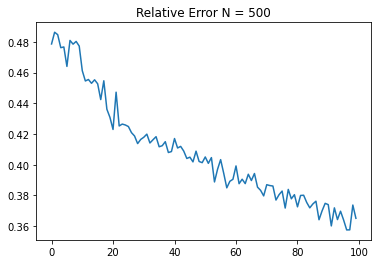

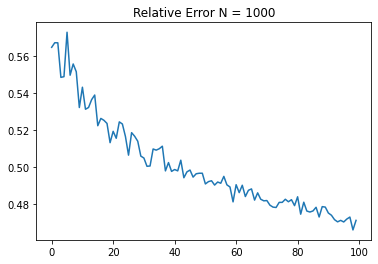

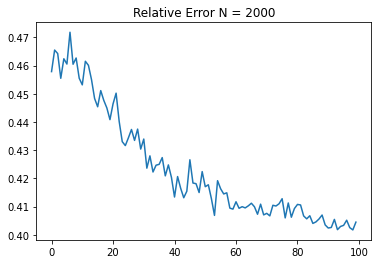

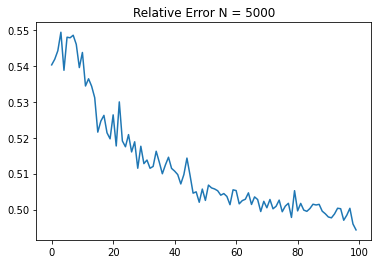

In [9]:
for i in range(5):
    plt.plot(rel_all[i])
    plt.title("Relative Error N = " + str(get_n(i)))
    plt.show()

For N = 100, the relative error slowly declines then massively declines as P approaches 100, for higher values of N there is a more consistent decline.

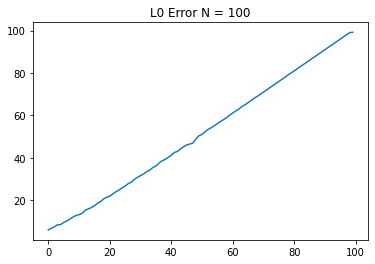

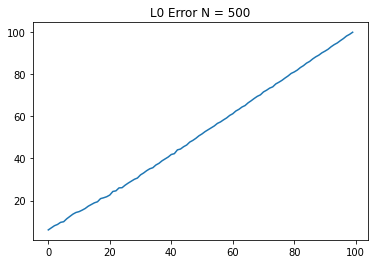

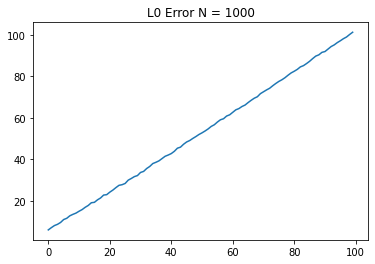

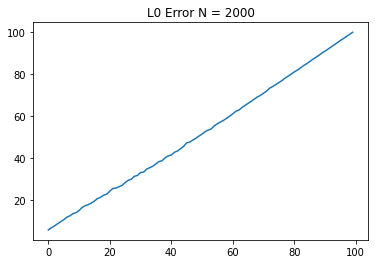

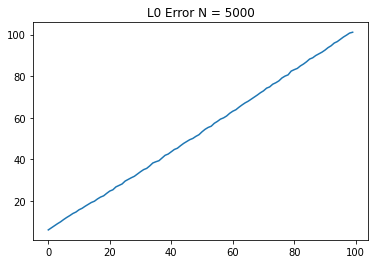

In [10]:
for i in range(5):
    plt.plot(l0_all[i])
    plt.title("L0 Error N = " + str(get_n(i)))
    plt.show()

L0 error is consistent for all N

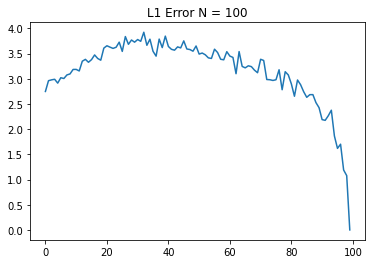

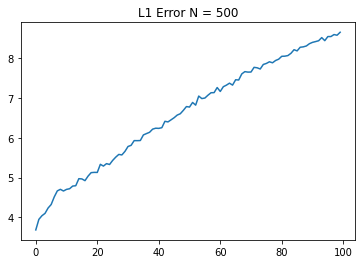

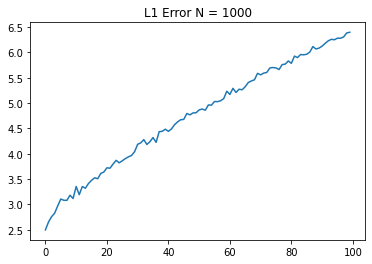

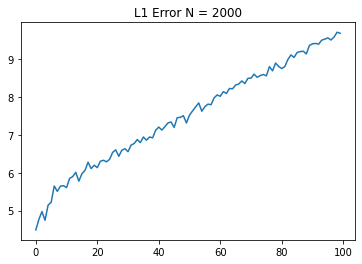

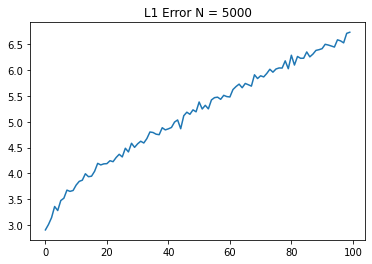

In [11]:
for i in range(5):
    plt.plot(l1_all[i])
    plt.title("L1 Error N = " + str(get_n(i)))
    plt.show()

L1 error for N = 100 is very different, it increases then takes a steep decline at high P. For the others, the pattern of a somewhat linear growth remain.